In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from yellowbrick.target import FeatureCorrelation

In [2]:
df_base = pd.read_csv(r"D:\OneDrive - Universität zu Köln\Uni\AA\Project\aa_project\Data\berlin_final.csv")
# df.drop(columns = ["weekday_str", "city", "Unnamed: 0", "date", "hour", "b_number"], inplace = True)
# df = df[["day", ""]]
df_w = pd.read_csv(r"D:\OneDrive - Universität zu Köln\Uni\AA\Project\aa_project\Data\berlin_weather.csv")
df_w.drop(columns = ["sid", "Unnamed: 0"], inplace = True)
df_w.datetime = pd.to_datetime(df_w.datetime)

def get_trips(datetime):
    return len(df_base[(df_base["month"] == datetime.month) & (df_base["date"] == datetime.day) & (df_base["hour"] == datetime.hour)].index)

In [3]:
df_w["num_trips"] = df_w["datetime"].apply(get_trips)

In [4]:
def get_month(datetime):
    return datetime.month
def get_hour(datetime):
    return datetime.hour
def get_weekday(datetime):
    return datetime.weekday() + 1

In [5]:
df_w['month'] = df_w['datetime'].apply(get_month)
df_w['hour'] = df_w['datetime'].apply(get_hour)
df_w['weekday'] = df_w['datetime'].apply(get_weekday)


In [6]:
start = dt.datetime.strptime('2019-03-15 13:00:00', '%Y-%m-%d %H:%M:%S')
end = dt.datetime.strptime('2019-03-19 08:00:00', '%Y-%m-%d %H:%M:%S')

df_w.drop(df_w[(df_w.datetime >= start) &
         (df_w.datetime <= end)].index, inplace = True)

In [13]:
df = df_w[['month', 'weekday', 'hour', 'num_trips', 'temperature', 'precipitation', 'wind_speed']]
df_target = df[['num_trips']]
df_data = df.drop('num_trips', axis=1)

c:\users\janfd\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
c:\users\janfd\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


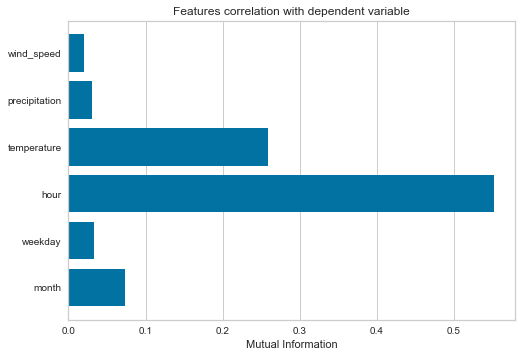

In [14]:
X, y = df_data, df_target

features = np.array(df_data.columns)

# Create a list of the discrete features
discrete = [False for _ in range(len(features))]
discrete[1] = True

# Instantiate the visualizer
visualizer = FeatureCorrelation(method='mutual_info-regression', labels=features)

visualizer.fit(X, y, discrete_features=discrete, random_state=0)
visualizer.show()